## Resumo aula 3 de Machine Learning ##

No extremo desta abordagem, podemos tomar o número  k  de folds igual ao número de observações na base ( n ). Neste caso, utiliza-se uma única observação para teste, enquanto o resto do dataset é utilizado para treino. Essa abordagem é conhecida como leave one out (LOO):

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler


<div>
<h1>Crossvalidation</h1>
Além de permitir uma avaliação mais robusta de um modelo(verificando a capacidade de generalização),</br>
o CV pode também ser utilizado para um propósito muito importante:</br>
a escolha de valores adequados de hiperparâmetros de um modelo - processo conhecido como hyperparameter tuning.</br>
como/por que utilizar CV para o ajuste de hiperparâmetros?

Ao testarmos diferentes valores/combinações de hiperparâmetros em diferentes folds, temos uma estimativa mais 
realista sobre o efeito destas escolhas:</br>
Se o resultado for bom em todos os folds (ou bom em média), temos um indicativo mais robusto de que de fato 
aquela é uma boa escolha.</br>
Em particular, fica muito mais difícil de cometermos overfitting através da escolha de hiperparâmetros que ajustem</br> 
muito bem uma única base de treino.</br>
No sklearn, temos o procedimento de CV incorporado a algumas classes de hipóteses:

Lasso CV</br>
Ridge CV</br>
ElasticNetCV</br>
LogisticRegressionCV</br>
-Em todos os casos, é possível especificar uma lista de hiperparâmetros a serem percorridos, e o modelo com melhor </br> 
hiperparâmetro (ou combinação de hiperparâmetros) é escolhido!
</div>

## Exercício
1 - Teste diferentes regressores CV com a base house_prices
Aumente a complexidade da hipótese permitindo uma regressão polinomial, e deixe o CV decidir uma boa regularização!

In [202]:
house_ds=pd.read_csv('usa_housing.csv')
house_ds.drop(columns='Address' ,inplace=True)
house_ds.info()
house_raw = house_ds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [203]:
house_ds.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [204]:
X = house_ds.drop(columns='Price')
y = house_ds['Price']
scoring = ("neg_mean_absolute_error", "neg_root_mean_squared_error", "r2")
en = ElasticNet(alpha=0.5, l1_ratio=0.5) 
estimator = LinearRegression()
kf5 = KFold(n_splits=5, shuffle=True)
cv = cross_validate(estimator=estimator, X=X, y=y, cv=kf5, scoring=scoring,
                           return_train_score=True)

cv

{'fit_time': array([0.00699925, 0.00399995, 0.00200081, 0.00399947, 0.00300074]),
 'score_time': array([0.00400043, 0.00200152, 0.00199819, 0.00200248, 0.00199938]),
 'test_neg_mean_absolute_error': array([-81814.58316019, -82703.801092  , -82758.60134894, -80758.93784433,
        -79213.86256219]),
 'train_neg_mean_absolute_error': array([-81280.64865298, -81027.21037466, -81024.64551709, -81511.40096478,
        -81891.70309083]),
 'test_neg_root_mean_squared_error': array([-102191.60920932, -102409.33373972, -103545.97223701,
         -99911.83715164,  -97790.98591128]),
 'train_neg_root_mean_squared_error': array([-100841.39918947, -100770.89656981, -100483.27238714,
        -101386.37296175, -101920.44617504]),
 'test_r2': array([0.91174232, 0.91459686, 0.91981131, 0.92009568, 0.92246593]),
 'train_r2': array([0.91945166, 0.9188227 , 0.9174986 , 0.9175012 , 0.91689628])}

,train_neg_mean_absolute_error,test_neg_mean_absolute_error
count,5.000000,5.000000
mean,-81347.121720,-81449.957202
std,365.482345,1491.245544
min,-81891.703091,-82758.601349
25%,-81511.400965,-82703.801092
50%,-81280.648653,-81814.583160
75%,-81027.210375,-80758.937844
max,-81024.645517,-79213.862562



Distribuição da métrica neg_mean_absolute_error de treino:


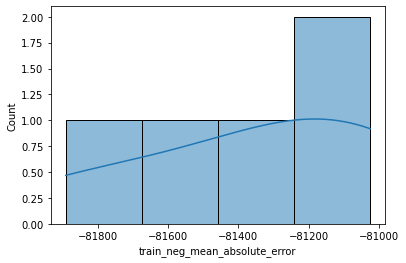


Distribuição da métrica neg_mean_absolute_error de teste:


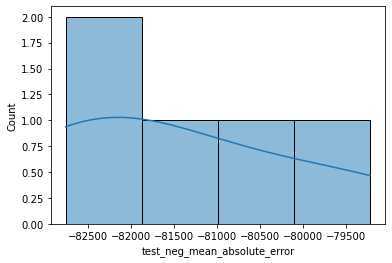

----------------------------------------------------------------------------------------------------


,train_neg_root_mean_squared_error,test_neg_root_mean_squared_error
count,5.000000,5.000000
mean,-101080.477457,-101169.947650
std,572.007899,2303.561781
min,-101920.446175,-103545.972237
25%,-101386.372962,-102409.333740
50%,-100841.399189,-102191.609209
75%,-100770.896570,-99911.837152
max,-100483.272387,-97790.985911



Distribuição da métrica neg_root_mean_squared_error de treino:


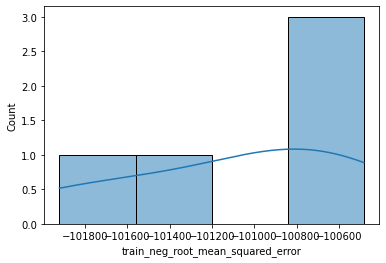


Distribuição da métrica neg_root_mean_squared_error de teste:


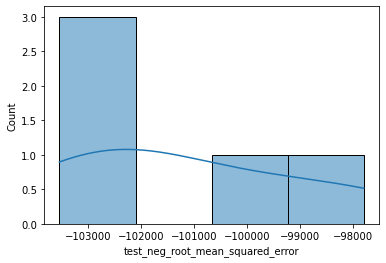

----------------------------------------------------------------------------------------------------


,train_r2,test_r2
count,5.000000,5.000000
mean,0.918034,0.917742
std,0.001060,0.004417
min,0.916896,0.911742
25%,0.917499,0.914597
50%,0.917501,0.919811
75%,0.918823,0.920096
max,0.919452,0.922466



Distribuição da métrica r2 de treino:


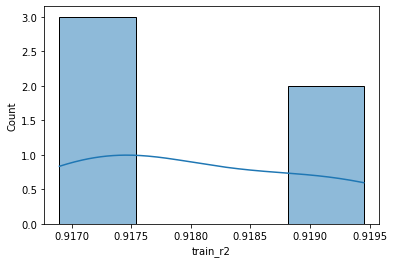


Distribuição da métrica r2 de teste:


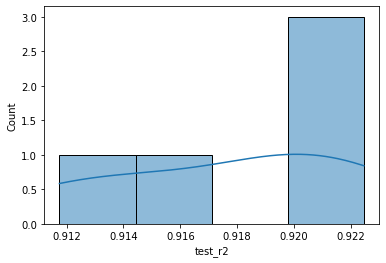

----------------------------------------------------------------------------------------------------


In [205]:
result_cv = pd.DataFrame(cv)
colunas_metricas = result_cv.columns.tolist()[2:]
colunas_metricas = result_cv.columns.tolist()[2:]

for i in range(0, len(colunas_metricas), 2):
    display(result_cv[[colunas_metricas[i+1], colunas_metricas[i]]].describe())  
    print(f'\nDistribuição da métrica {colunas_metricas[i+1].replace("train_", "")} de treino:')
    sns.histplot(data=result_cv, x=colunas_metricas[i+1], kde=True)
    plt.show()
    
    print(f'\nDistribuição da métrica {colunas_metricas[i].replace("test_", "")} de teste:')
    sns.histplot(data=result_cv, x=colunas_metricas[i], kde=True)
    plt.show()

    print("-"*100)



In [206]:
X = house_raw.drop(columns='Price')
y = house_raw['Price']
estimator = LogisticRegressionCV()
reg = StandardScaler()
reg.fit(X,y)
kf5 = KFold(n_splits=5, shuffle=True)
en = ElasticNetCV(alphas=np.linspace(0.5, 1, 10), l1_ratio=np.linspace(0.5, 1, 10), cv=kf5)

# en.fit(X, y)
# print(en.alphas_)
# print(en.l1_ratio_)


In [207]:
en.fit(X, y)
print(en.alphas_)
print(en.l1_ratio_)

[1.         0.94444444 0.88888889 0.83333333 0.77777778 0.72222222
 0.66666667 0.61111111 0.55555556 0.5       ]
1.0
